In [1]:
#### 1.Loading_data_for_molecular_analysis.R
## 1)Loading cluster results
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)


$paper
[1] "Scalable Open Science Approach for Mutation Calling of Tumor Exomes Using Multiple Genomic Pipelines"

$project
[1] "PanCanAtlas Publications"

$url
[1] "https://gdc.cancer.gov/about-data/publications/pancanatlas"

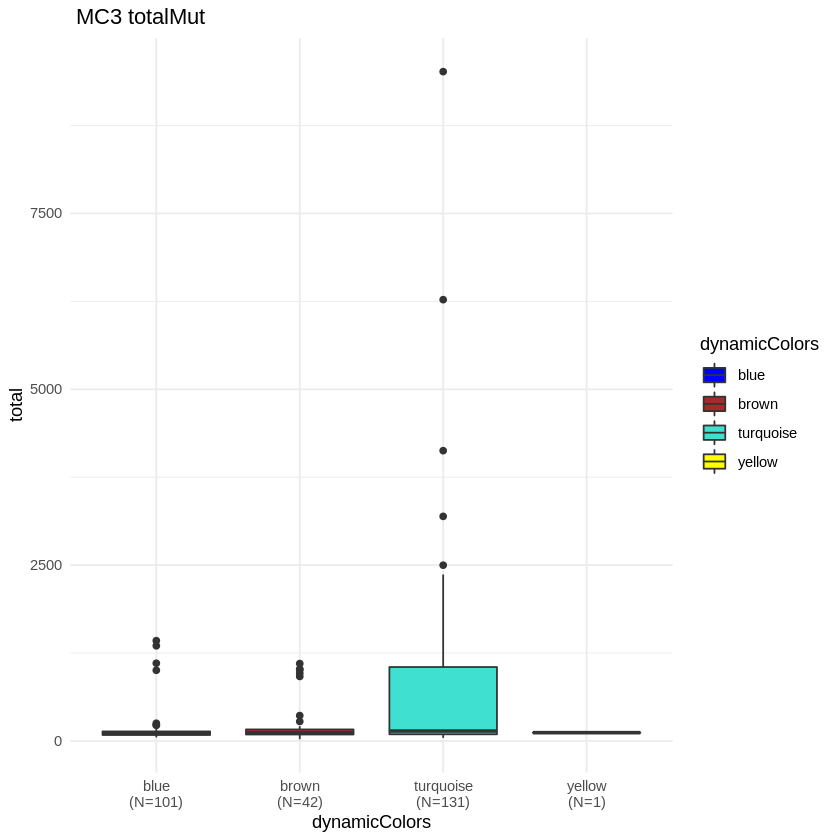

In [2]:
#### 1)Total Mutation Plot for each group ####
#Scalable Open Science Approach for Mutation Calling of Tumor Exomes Using Multiple Genomic Pipelines
# Loadingdata
COAD_mc3.v0.2.8.PUBLIC.maf_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Mutations_mc3_v0.2.8_PUBLIC/COAD_mc3.v0.2.8.PUBLIC.maf_dataset.rds")
COAD_mc3.v0.2.8.PUBLIC.maf_dataset$mc3.v0.2.8.PUBLIC.metadata
COAD.mc3.PUBLIC_sampleSummary <- COAD_mc3.v0.2.8.PUBLIC.maf_dataset$COAD.mc3.PUBLIC_sampleSummary
COAD.mc3.PUBLIC_sampleSummary$rownames <- rownames(COAD.mc3.PUBLIC_sampleSummary)
# Merge table
MergeTable.totalMut <- dplyr::left_join(Cluster.df, COAD.mc3.PUBLIC_sampleSummary, by = "rownames")
# Plot 
library(ggplot2)
# Remove NA value
data=subset(MergeTable.totalMut, !is.na(MergeTable.totalMut$total))
# ggplot
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors, y = total,fill=dynamicColors))+
  geom_boxplot()+scale_x_discrete(labels=xlabs) + theme_minimal()+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title =" MC3 totalMut")


Warning message:
“Column `rownames` joining character vector and factor, coercing into character vector”

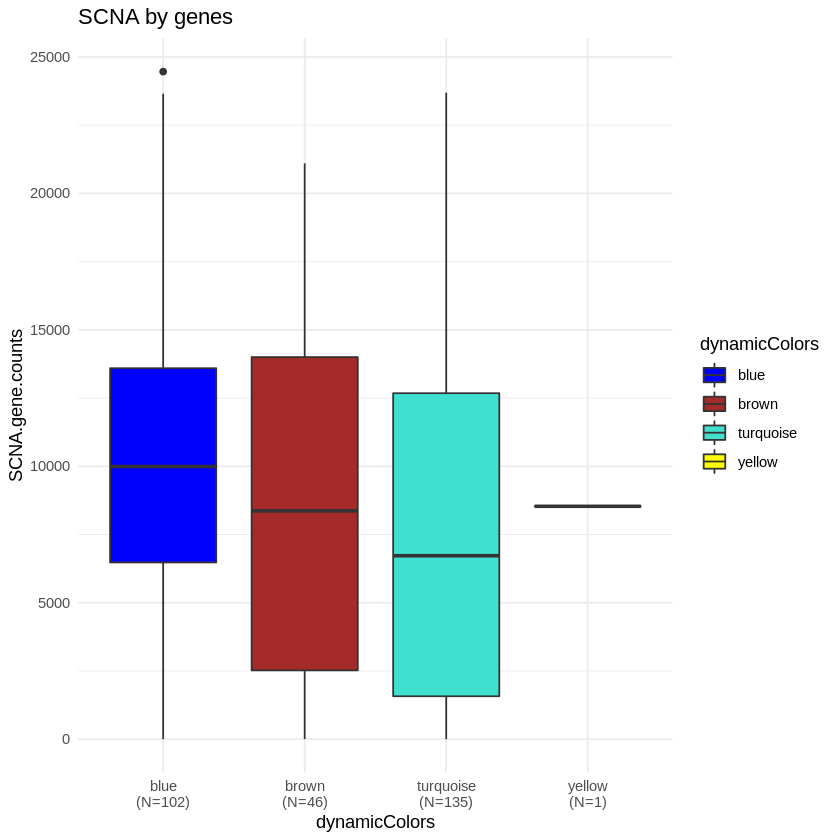

In [4]:
#### 2)SCNA Plot for each group ####
## Loading data
### 1.read the COAD_UCSC_gene_gistic2_thresholded_dataset from UCSC XENA
COAD_gene_gistic2_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/gene_level_copy_number_gistic2_thresholded/COAD_UCSC_gene_gistic2_thresholded_dataset.rds")
COAD.gene.copynumber.gistic2.thresholded <- COAD_gene_gistic2_dataset$COAD.gene.copynumber.gistic2.thresholded
#COAD.gene.copynumber.gistic2.thresholded[1:5,1:5]
### 2.Counts the SCNA like paper per sample
# The consensus molecular subtypes of colorectal cancer doi:10.1038/nm.3967
# We counted GISTIC scores −2/−1/+1/+2 as events for SCNA estimation 
#(<Q1 was considered low and ≥Q1 was considered high).
COAD.SCNA.gistic2 <- COAD.gene.copynumber.gistic2.thresholded
COAD.SCNA.gistic2[COAD.SCNA.gistic2 !=0 ] <- 1 # all non-zero were copy number alterations
### 3.Count SCNA for each samples
COAD.SCNA.sample.counts <- t(COAD.SCNA.gistic2)
COAD.SCNA.sample.counts <- rowSums(COAD.SCNA.sample.counts)
COAD.SCNA.sample.counts <- data.frame(rownames = names(COAD.SCNA.sample.counts),
                                      SCNA.gene.counts = COAD.SCNA.sample.counts)
# Merge table
MergeTable.SCNA <- dplyr::left_join(Cluster.df, COAD.SCNA.sample.counts, by = "rownames")
# ggplot
library(ggplot2)
# Remove NA value
data=subset(MergeTable.SCNA, !is.na(MergeTable.SCNA$SCNA.gene.counts))

xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors, y = SCNA.gene.counts,fill=dynamicColors))+
  geom_boxplot()+scale_x_discrete(labels=xlabs) + theme_minimal()+
  scale_fill_manual(values=c("blue","brown","turquoise","yellow")) +
  labs(title ="SCNA by genes")


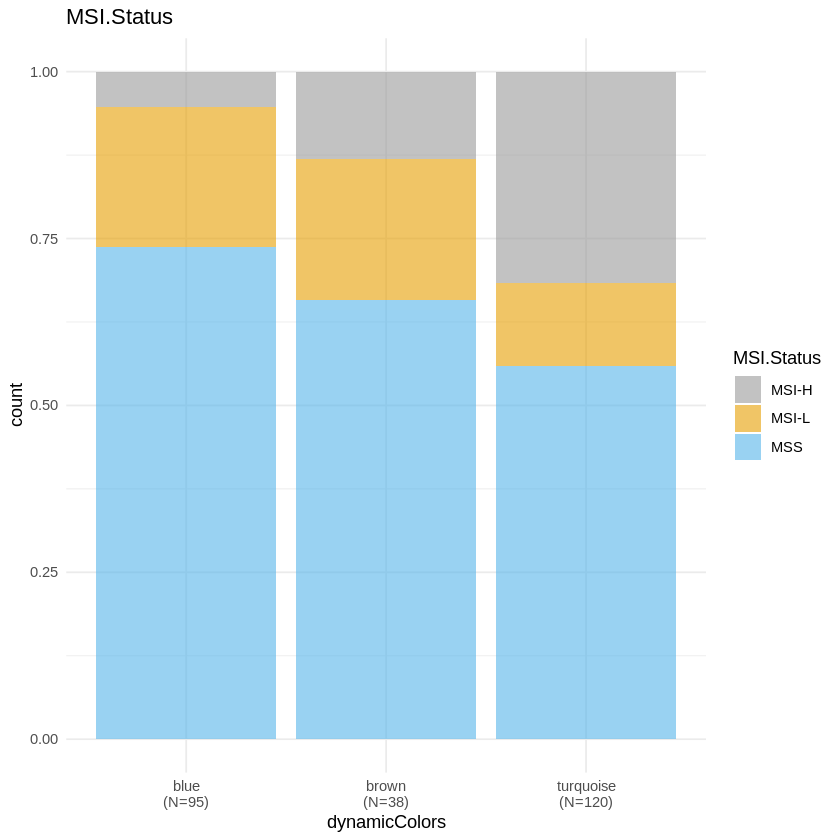

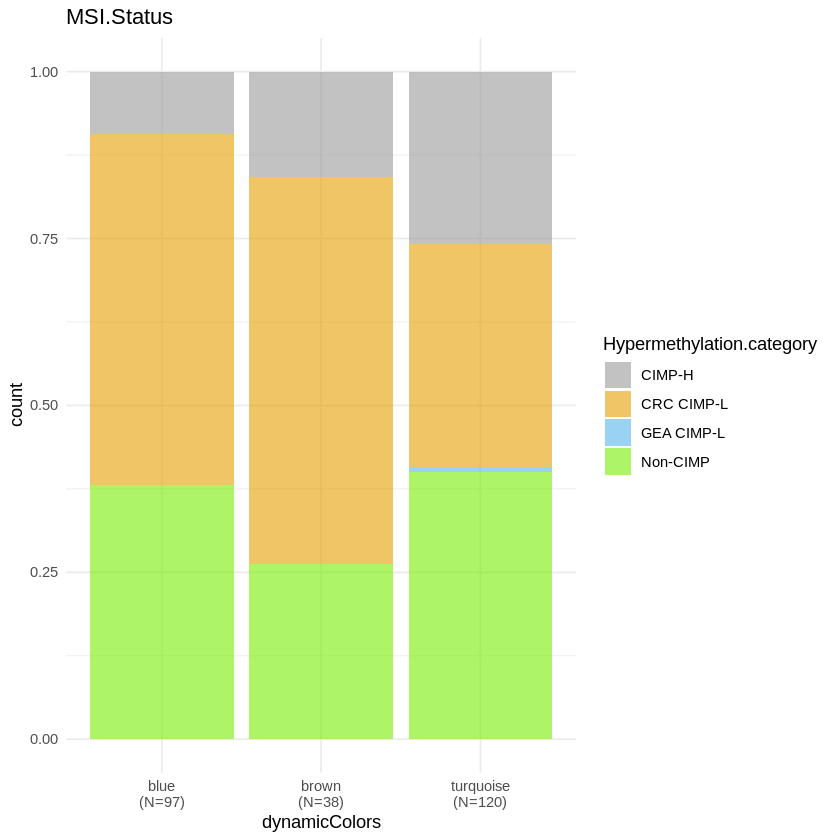

In [5]:
#### 3)MSI and CIMP Plot for each group ####
# Paper: Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
## 1.Read data
COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds")
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset$COAD.GI.Adenocarcinomas.Characteristics
## 2.Merge table
MergeTable.GI.Char <- dplyr::left_join(Cluster.df, COAD.GI.Adenocarcinomas.Characteristics, by = "rownames")
# MSI.Status #
library(ggplot2)
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char$MSI.Status))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=MSI.Status))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title ="MSI.Status")
# Hypermethylation.category #
library(ggplot2)
data=subset(MergeTable.GI.Char, !is.na(MergeTable.GI.Char$Hypermethylation.category))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=Hypermethylation.category))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00"),0.6)) +
  labs(title ="MSI.Status")

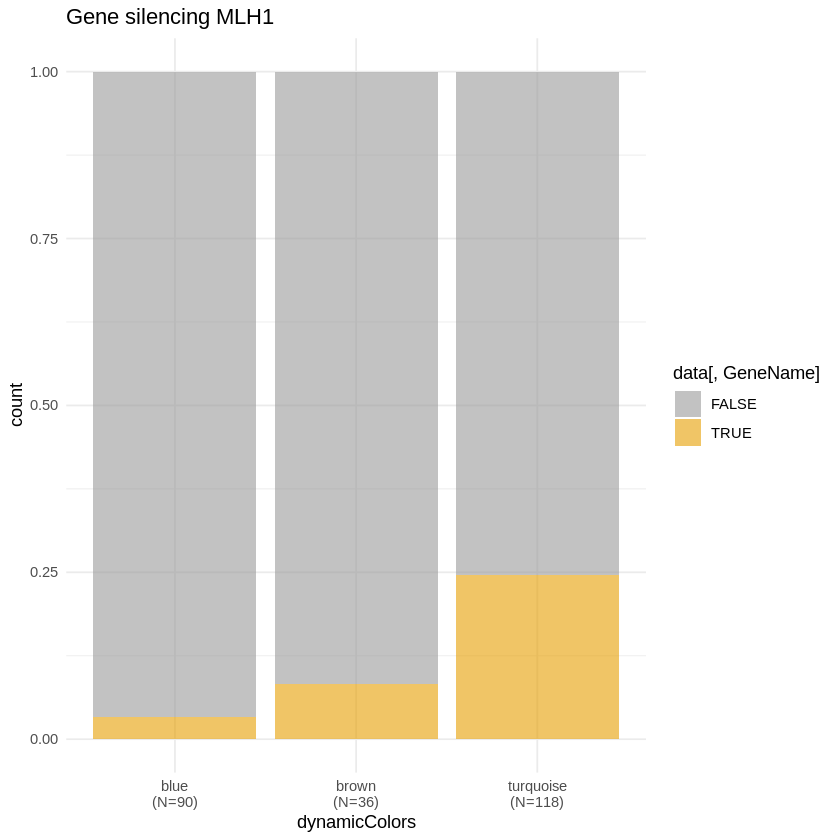

In [6]:
#### 4) Gene Epigenetic.Silencing (methylation)
# Paper: Comparative Molecular Analysis of Gastrointestinal Adenocarcinomas
## 1.Read data
COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds")
COAD.Epigenetic.Silencing.Calls <- COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset$COAD.Epigenetic.Silencing.Calls
## 2.Merge table
GeneName <- "MLH1"
Gene.silence <-t(COAD.Epigenetic.Silencing.Calls[GeneName,])
Gene.silence <- as.data.frame(Gene.silence)
Gene.silence$rownames <- rownames(Gene.silence)
MergeTable.Gene.silence<- dplyr::left_join(Cluster.df, Gene.silence, by = "rownames")
## 3.Ploting
library(ggplot2)
data=subset(MergeTable.Gene.silence, !is.na(MergeTable.Gene.silence[,GeneName]))
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=data[,GeneName]))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =paste("Gene silencing",GeneName))


,TCGA.3L.AA1B.01,TCGA.4N.A93T.01,TCGA.4T.AA8H.01,TCGA.5M.AAT4.01,TCGA.5M.AAT6.01
,<int>,<int>,<int>,<int>,<int>
UBE2Q2,0,0,0,0,0
CHMP1B,0,0,0,0,0
PSMA2P1,0,0,0,0,0
SHQ1P1,0,0,0,0,0
CPHL1P,0,0,0,0,0


,TCGA.3L.AA1B.01,TCGA.4N.A93T.01,TCGA.4T.AA8H.01,TCGA.5M.AAT4.01,TCGA.5M.AAT6.01,TCGA.5M.AATE.01,TCGA.A6.2671.01,TCGA.A6.2674.01,TCGA.A6.2675.01,TCGA.A6.2677.01,⋯,TCGA.QG.A5YV.01,TCGA.QG.A5YW.01,TCGA.QG.A5YX.01,TCGA.QG.A5Z1.01,TCGA.QG.A5Z2.01,TCGA.QL.A97D.01,TCGA.RU.A8FL.01,TCGA.SS.A7HO.01,TCGA.T9.A92H.01,TCGA.WS.AB45.01
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BRAF,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


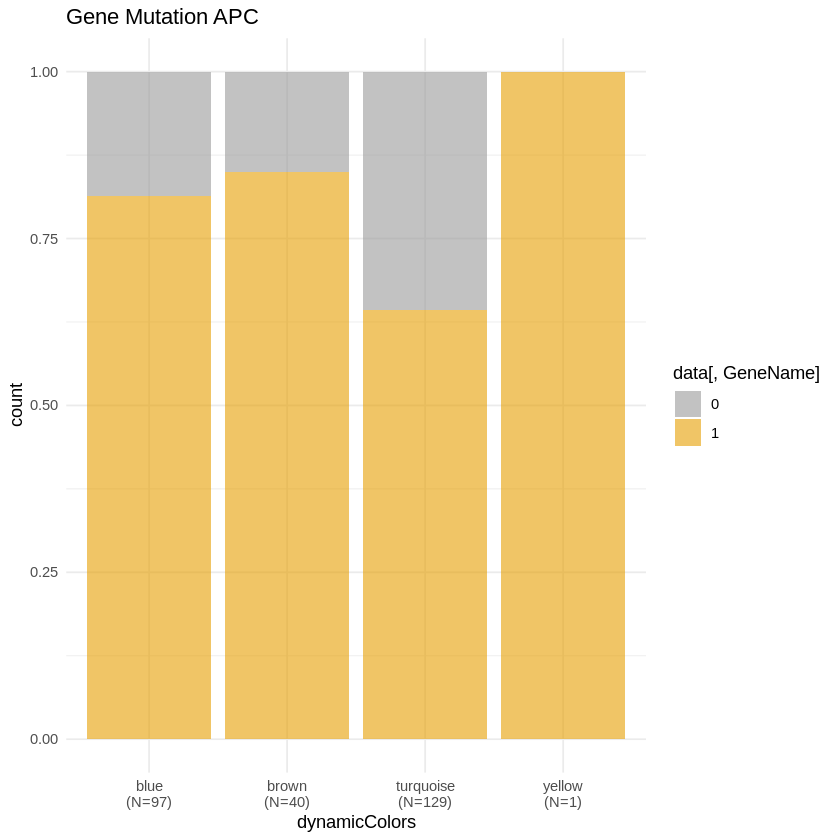

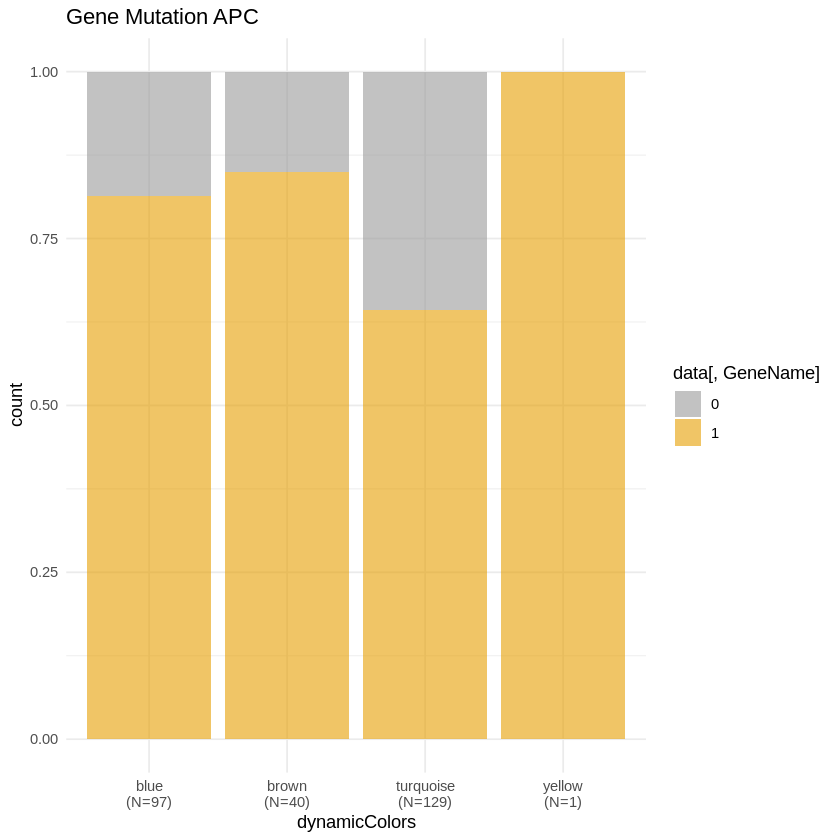

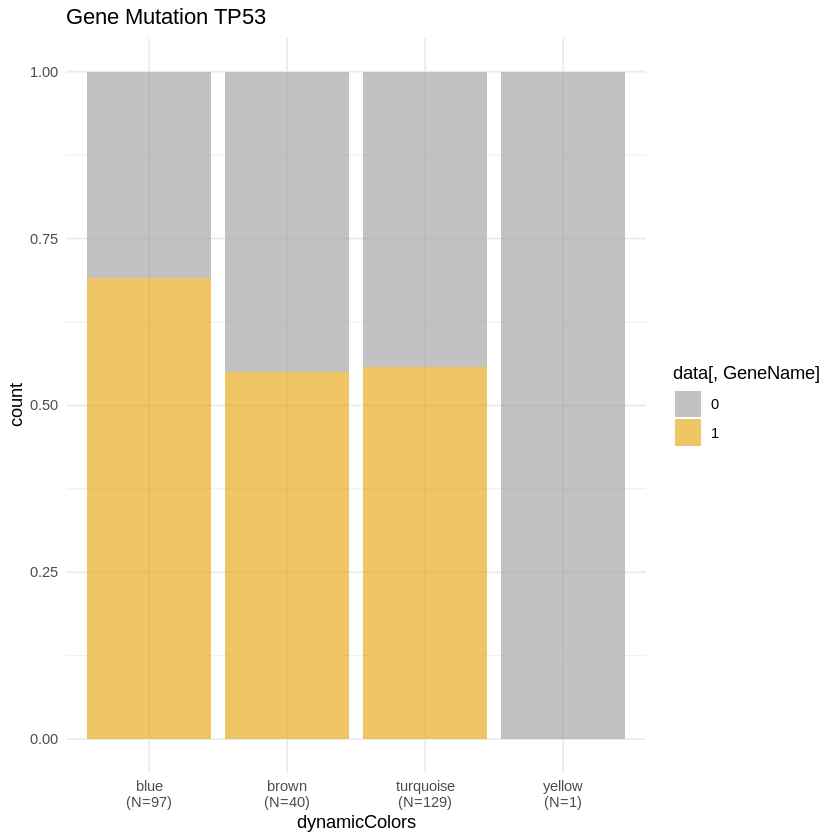

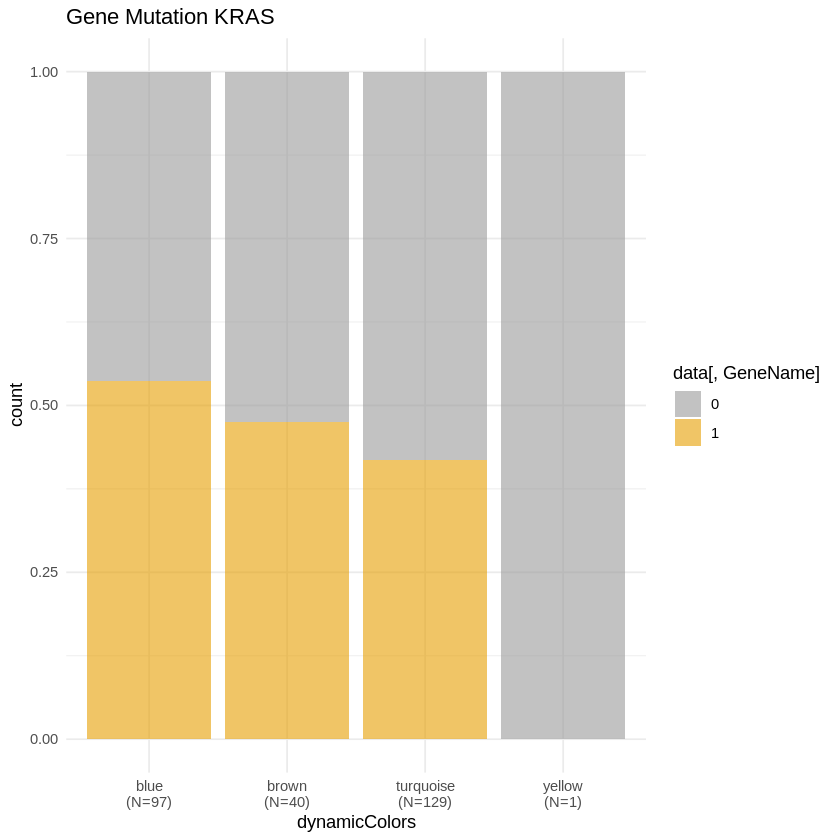

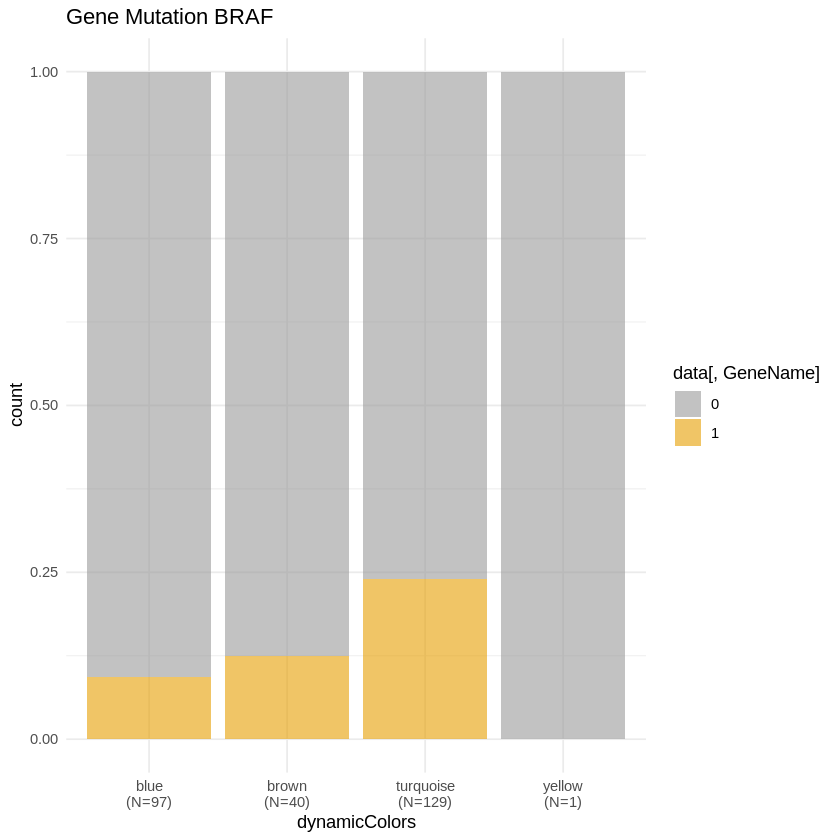

In [7]:
#### 5)Gene mutation Plot for each group ####
# Paper: Scalable Open Science Approach for Mutation Calling of Tumor Exomes Using Multiple Genomic Pipelines
# But I download from Xena
## 1.Read data
COAD_TCGA_PanCan33_mc3_nonsilentGene_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/somatic_mutation_SNP_INDEL/MC3_Gene_level_non_silent_mutation/COAD_TCGA_PanCan33_mc3_nonsilentGene_dataset.rds")
# COAD_TCGA_PanCan33_mc3_nonsilentGene_dataset$mc3.nonsilentGene.metadata
COAD.mc3.nonsilentGene.xena <- COAD_TCGA_PanCan33_mc3_nonsilentGene_dataset$COAD.mc3.nonsilentGene.xena
#COAD.mc3.nonsilentGene.xena[1:5,1:5]
## 2.Merge table
GeneName <- "APC"
Gene.Mut <-t(COAD.mc3.nonsilentGene.xena[GeneName,])
Gene.Mut <- as.data.frame(Gene.Mut)
Gene.Mut$rownames <- rownames(Gene.Mut)
MergeTable.Gene.Mut<- dplyr::left_join(Cluster.df, Gene.Mut, by = "rownames")
## 3.Ploting
library(ggplot2)
data=subset(MergeTable.Gene.Mut, !is.na(MergeTable.Gene.Mut[,GeneName]))
data[,GeneName] <- as.factor(data[,GeneName])
xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
ggplot(data,aes(x = dynamicColors,fill=data[,GeneName]))+
  geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
  labs(title =paste("Gene Mutation",GeneName))

#### For loop for mutation gene ploting
geneList <- c("APC", "TP53", "KRAS", "BRAF")
COAD.mc3.nonsilentGene.xena["BRAF",]
for(i in geneList){
  GeneName <- i
  Gene.Mut <-t(COAD.mc3.nonsilentGene.xena[GeneName,])
  Gene.Mut <- as.data.frame(Gene.Mut)
  Gene.Mut$rownames <- rownames(Gene.Mut)
  MergeTable.Gene.Mut<- dplyr::left_join(Cluster.df, Gene.Mut, by = "rownames")
  ## 3.Ploting
  library(ggplot2)
  data=subset(MergeTable.Gene.Mut, !is.na(MergeTable.Gene.Mut[,GeneName]))
  data[,GeneName] <- as.factor(data[,GeneName])
  xlabs <- paste(levels(data$dynamicColors),"\n(N=",table(data$dynamicColors),")",sep="")
  p <- ggplot(data,aes(x = dynamicColors,fill=data[,GeneName]))+
    geom_bar(position = "fill") +scale_x_discrete(labels=xlabs) + theme_minimal() +
    scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) +
    labs(title =paste("Gene Mutation",GeneName))
  print(p)
}